In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
daily_df = pd.read_csv('usd_inr_daily_raw.csv', index_col=0, parse_dates=True)

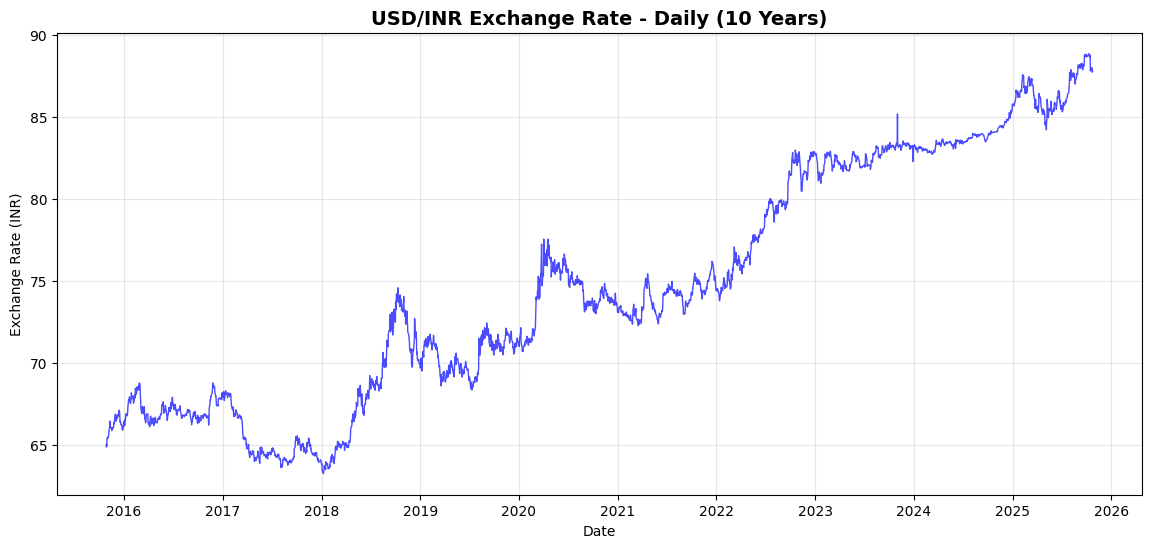

In [ ]:
plt.figure(figsize=(14, 6))

plt.plot(daily_df.index, daily_df['USD_INR'], linewidth=1, color='blue', alpha=0.8)

plt.title('USD/INR Exchange Rate - Daily (10 Years)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (INR)')

plt.grid(True, alpha=0.3)

plt.show()


In [37]:
daily_df.describe()

,USD_INR
count,2603.000000
mean,74.709749
std,7.201498
min,63.264999
25%,68.129749
50%,73.824097
75%,82.418648
max,88.865402


In [3]:
from scipy import stats
from scipy.stats import shapiro, jarque_bera, normaltest


In [4]:
# Extract the series
usd_inr = daily_df['USD_INR']

# Calculate returns
daily_returns = usd_inr.pct_change().dropna()
log_returns = np.log(usd_inr / usd_inr.shift(1)).dropna()

print(f"\n✓ Calculated daily returns: {len(daily_returns)} observations")



✓ Calculated daily returns: 2602 observations


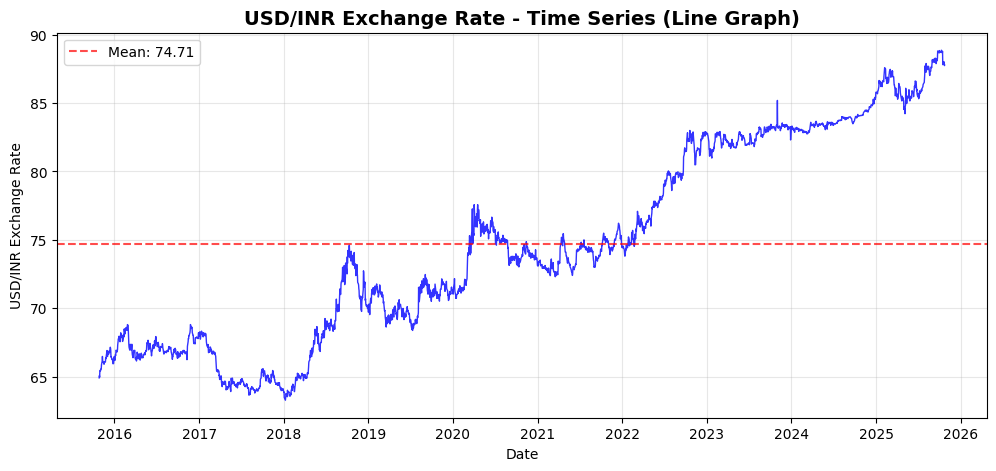

In [ ]:
#line graph
plt.figure(figsize=(12, 5))
plt.plot(daily_df.index, daily_df['USD_INR'], linewidth=1, color='blue', alpha=0.8)
plt.axhline(daily_df['USD_INR'].mean(), color='red', linestyle='--', 
            label=f'Mean: {daily_df["USD_INR"].mean():.2f}', alpha=0.7)
plt.title('USD/INR Exchange Rate - Time Series (Line Graph)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('USD/INR Exchange Rate')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

what is a linegraph
- Shows how a variable changes over time.
- It is best for: Visualizing trends, seasonality, and overall time-dependent patterns.
- Pros:
 - Easy to see trends.
 - Good for continuous time series.
- Cons:
 - Can obscure variability if data is noisy.

 inference
 - shows strong upward trend, increased from 65 in 2015 to ~89 in 2025
 - no clear seasonality, look like persistent trend rather than cyclical pattern.
 - Mean (74.71): Much lower than current price, showing the strong upward drift
 - INR has consistently weakened against USD over the decade.

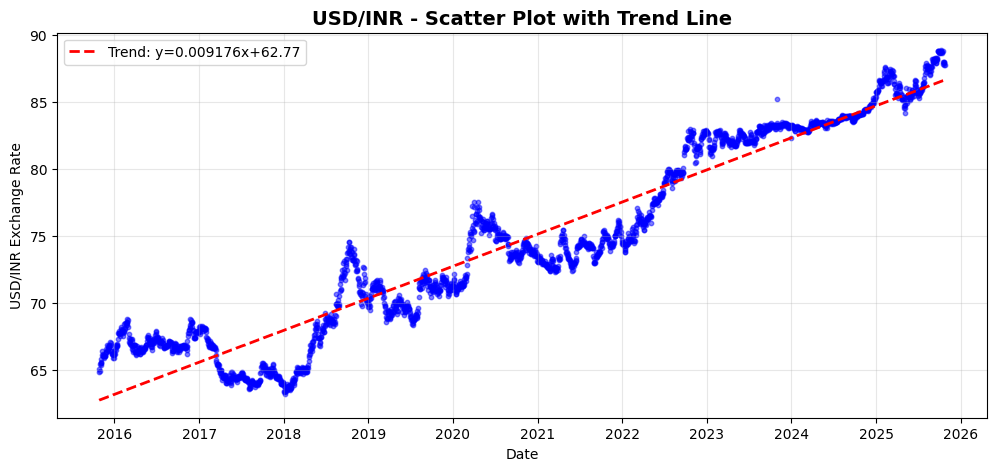

In [ ]:
# 2. SCATTER PLOT - (with trend)
x_numeric = np.arange(len(daily_df))
z = np.polyfit(x_numeric, daily_df['USD_INR'].values, 1)
p = np.poly1d(z)

plt.figure(figsize=(12, 5))
plt.scatter(daily_df.index, daily_df['USD_INR'], alpha=0.5, s=10, color='blue')
plt.plot(daily_df.index, p(x_numeric), "r--", linewidth=2, 
         label=f'Trend: y={z[0]:.6f}x+{z[1]:.2f}')
plt.title('USD/INR - Scatter Plot with Trend Line', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('USD/INR Exchange Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Purpose: Shows the relationship between two variables, or just plots individual points.

Best for: Checking distribution, clustering, or relationships between variables.

Example use case: Daily USD/INR values to see volatility or gaps.

Pros:
Shows individual observations clearly.
Good for spotting outliers.

Cons:
Harder to see trends over time compared to line plots.
inference:

Linear trend equation: y = 0.009176x + 62.77

Positive slope confirms upward trend
Rate: ~0.009 INR per day increase


Good fit: Data points closely follow the trend line
Acceleration visible: Recent years show steeper increase (points above trend line)
No mean reversion: Price doesn't return to historical average

Inference: Strong, consistent appreciation of USD against INR with recent acceleration.

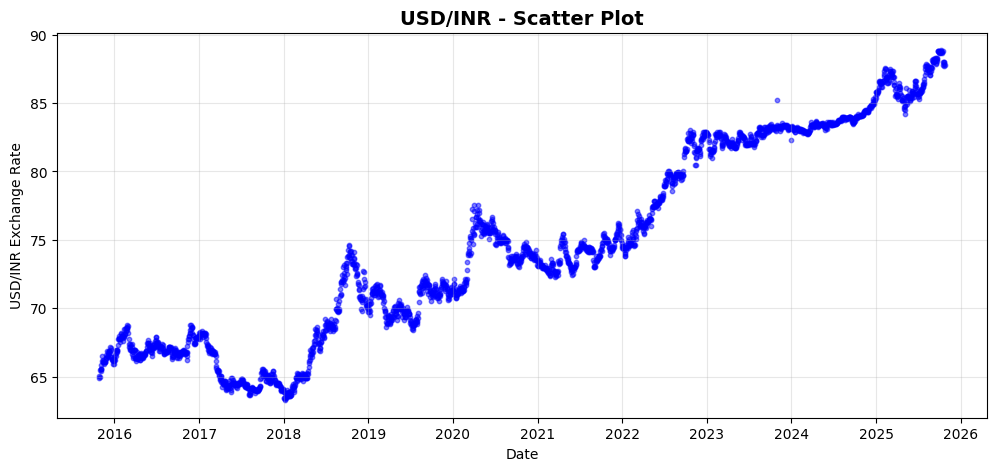

In [ ]:
#scatter plot wo trend
plt.figure(figsize=(12, 5))
plt.scatter(daily_df.index, daily_df['USD_INR'], alpha=0.5, s=10, color='blue')
plt.title('USD/INR - Scatter Plot', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('USD/INR Exchange Rate')
plt.grid(True, alpha=0.3)
plt.show()


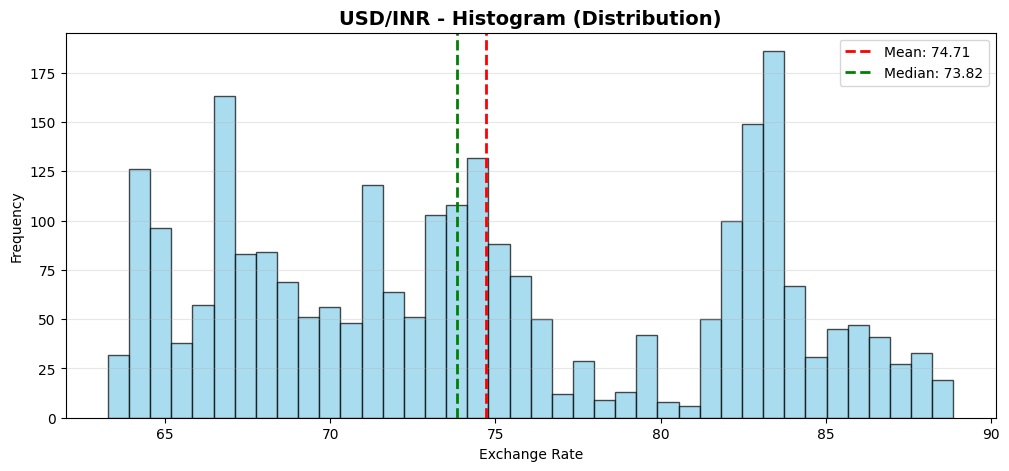

In [ ]:
# 3. HISTOGRAM
plt.figure(figsize=(12, 5))
plt.hist(daily_df['USD_INR'], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(daily_df['USD_INR'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {daily_df["USD_INR"].mean():.2f}')
plt.axvline(daily_df['USD_INR'].median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: {daily_df["USD_INR"].median():.2f}')
plt.title('USD/INR - Histogram (Distribution)', fontsize=14, fontweight='bold')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.show()


Key Observations:

Bimodal distribution: Two peaks visible

Peak 1: Around 67-68 (earlier period)
Peak 2: Around 83-85 (recent period)


Mean (74.71) vs Median (73.82): Close values
Right-skewed: Tail extends toward higher values
Gaps: Around 78-80 range (transition period)

Inference:

Exchange rate has shifted to a "new normal" (higher range)
Two distinct regimes: pre-2020 (~65-75) and post-2020 (~75-89)
This is typical of structural changes in currency markets

Text(0.5, 1.0, 'Q-Q Plot (Normality Test)')

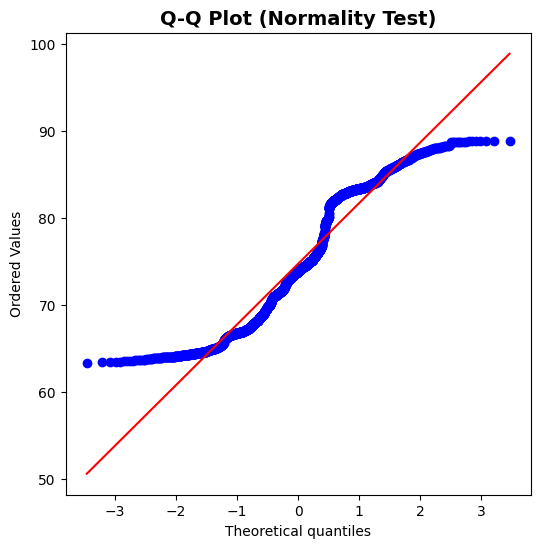

In [33]:
# 4. Q-Q PLOT - Normality Test
plt.figure(figsize=(6, 6))
stats.probplot(daily_df['USD_INR'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality Test)', fontsize=14, fontweight='bold')



A Q-Q plot (Quantile-Quantile plot) is a diagnostic plot used in statistics to compare the distribution of your data against a theoretical distribution, often the normal (Gaussian) distribution.


1. Purpose
To visually check whether data follows a certain distribution.
Commonly used to test normality.

2. How it works
The quantiles of  data are plotted on the y-axis.
The quantiles of the theoretical distribution (e.g., normal) are plotted on the x-axis.
If the points fall roughly along a straight diagonal line,  data is approximately from that distribution.
Deviations from the line indicate departures from the theoretical distribution (e.g., skewness, heavy tails).

Interpretation
Points on line: Data matches the theoretical distribution.
S-shaped curve: Heavy tails (leptokurtic or platykurtic).
Curve deviates at ends: Skewness in the data.

5. Use case in finance
A Q-Q plot helps check if daily returns or differences are normally distributed. This is important because many statistical models assume normality.

inference from graph 

S-shaped curve: Clear deviation from the red line
Heavy tails:
Left tail: Points below line (more extreme low values)
Right tail: Points above line (more extreme high values)
Fat tails in middle: Suggests leptokurtic distribution

Inference:
Data is NOT normally distributed
Has heavier tails than normal distribution
Extreme events (crashes/spikes) are more common than normal distribution predicts
Important for modeling:
Traditional models assuming normality may fail
Need robust methods
Risk management needs to account for fat tails

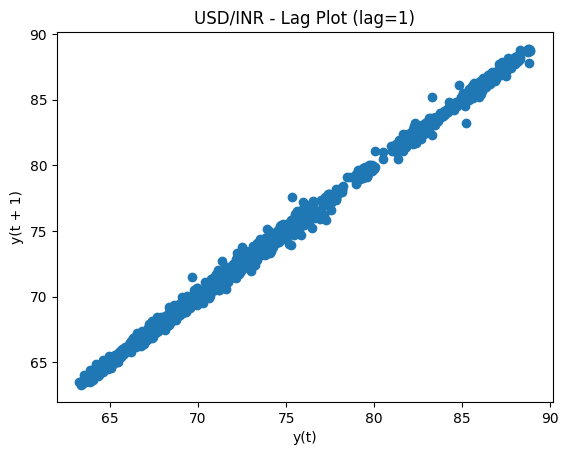

In [38]:
#lagplot 
from pandas.plotting import lag_plot

lag_plot(daily_df['USD_INR'])
plt.title("USD/INR - Lag Plot (lag=1)")
plt.show()


Key Inference from the Lag Plot
- Strong Positive Linear Correlation: The points in the plot form a tight, upward-sloping cluster, which indicates a strong positive linear relationship between y(t) and y(t+1).
- Implication: This suggests that the exchange rate at time t is a good predictor of the rate at time t+1. In other words, the series is highly autocorrelated at lag 1.
- What This Means for Currency Analysis
- Predictability: The USD/INR exchange rate shows persistence—today’s value is closely related to tomorrow’s. This is typical for financial time series, especially exchange rates, which often exhibit momentum or mean-reverting behavior.


missing valuess

In [35]:
print(daily_df.isnull().sum())


USD_INR    0
dtype: int64


has no null value as yfinance data only keeps  market date relevant data days

In [6]:
daily_df

,USD_INR,daily_diff
Date,,
2015-10-27,64.901001,NaN
2015-10-28,65.067001,64.901001
2015-10-29,64.945999,65.067001
2015-10-30,65.444000,64.945999
2015-11-02,65.415001,65.444000
...,...,...
2025-10-20,88.002296,87.990700
2025-10-21,87.879997,88.002296
2025-10-22,88.001602,87.879997
